### **TF-IDF**
## **Naive Bayes**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /home/tp-
[nltk_data]     home009/bberken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tp-
[nltk_data]     home009/bberken/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/tp-
[nltk_data]     home009/bberken/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **Open and load the data set**

In [46]:


df = pd.read_csv("spam_ham_dataset.csv")




## **ham/spam repartition**

/home/tp-home009/bberken/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


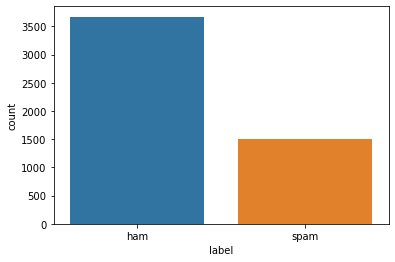

In [47]:
sn.countplot(df["label"])

## **Data set size**

In [48]:
df.shape

(5171, 4)

## **View Exemple of data** 

In [49]:
df.iloc[0]

id                                                         605
label                                                      ham
text         Subject: enron methanol ; meter # : 988291\nth...
label_num                                                    0
Name: 0, dtype: object

### **Message content of the above element**

In [50]:

df.iloc[0]["text"]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

## **Remove unnecessary columns**

In [51]:
df.drop("id",axis=1,inplace=True)
df.drop("label",axis=1,inplace=True)



### **Remaining attribute of the datafram**

In [52]:
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0
...,...,...
5166,Subject: put the 10 on the ft\nthe transport v...,0
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,Subject: industrial worksheets for august 2000...,0


## **Data Cleaning**
#### 1. *Remove Syntax*
#### 2. *Lowering Case*
#### 3. *Split Into An Array Of Word*
#### 4. *Remove StopWords*

In [53]:


from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
lm = WordNetLemmatizer() 
corpus = []
for i in range(0, len(df["text"])):
    review = re.sub('[^a-zA-Z]', ' ',df["text"][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    corpus.append(review)

### **TfidfVectorizer application on the corpus**

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()


# **resampling**

Comme on a travaille sur des données désiquilibrées : 
 * on appliquera sur nos données des méthodes de rééchantillonnage  : 
   * Sur-échantillonnage : Oversampling  qui consiste à augmenter le nombre d’observations de 
   la (des) classe(s) minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.
   * Sous-échantillonnage : Undersampling  qui consiste à diminuer  diminuant le nombre d’observations de la  (des) classe(s) majoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant. 
   * Génération d’échantillons synthétiques : qui consiste à générer des échantillons synthétiques de manière automatique et la également on distingue deux type d'algorithmes  :  
     * Les algorithmes de sur-échantillonnage en créant des échantillons synthétiques à partir de la classe minoritaire au lieu de créer de simples copies.
     * Les algorithmes de Sous-échantillonnage en générant un certain nombre de centroïdes à partir des données d’origine, afin de perdre le moins d’information possible sur la classe majoritaire, lorsque celle-ci doit être réduite afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant. 
   

### **The generation of synthetic samples**
   * Synthetic Oversampling

In [55]:

from imblearn.combine import SMOTETomek 
smk= SMOTETomek()

X_SO, Y_SO = smk.fit_resample(X,df["label_num"])
print ("taille de x_bal : ",len(X_SO))
print ("taille de y_bal : ",len(Y_SO))

taille de x_bal :  7342
taille de y_bal :  7342


* Synthetic undersampling

In [56]:
'''from imblearn.under_sampling import ClusterCentroids 
cc = ClusterCentroids()

X_SU, Y_SU = cc.fit_resample(X,df["label_num"])
print ("taille de x_bal : ",len(X_SU))
print ("taille de y_bal : ",len(Y_SU))'''

'from imblearn.under_sampling import ClusterCentroids \ncc = ClusterCentroids()\n\nX_SU, Y_SU = cc.fit_resample(X,df["label_num"])\nprint ("taille de x_bal : ",len(X_SU))\nprint ("taille de y_bal : ",len(Y_SU))'

### **classique Resampling**
   * Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
X_CO, Y_CO = ros.fit_resample(X,df["label_num"])

print ("taille de x_bal : ",len(X_CO))
print ("taille de y_bal : ",len(Y_CO))

taille de x_bal :  7344
taille de y_bal :  7344


 * Undersampling

In [58]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()
X_CU, Y_CU = rus.fit_resample(X,df["label_num"])

print ("taille de x_bal : ",len(X_CU))
print ("taille de y_bal : ",len(Y_CU))

taille de x_bal :  2998
taille de y_bal :  2998


## **Train set / Test set split**

In [59]:
from sklearn.model_selection import train_test_split

X_train_SO, X_test_SO, y_train_SO, y_test_SO = train_test_split(X_SO, Y_SO, test_size = 0.20, random_state = 0)

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(X_CO, Y_CO, test_size = 0.20, random_state = 0)

X_train_CU, X_test_CU, y_train_CU, y_test_CU = train_test_split(X_CU, Y_CU, test_size = 0.20, random_state = 0)



## **MultinomialNB fitting**

  * Fititing with Synthetic Oversampling data

In [63]:
from sklearn.naive_bayes import MultinomialNB
model_SO = MultinomialNB()
model_CO = MultinomialNB()
model_CU = MultinomialNB()

model_SO.fit(X_train_SO,y_train_SO)



MultinomialNB()

  * Fititing with Classique Oversampling data

In [64]:
model_CO.fit(X_train_CO,y_train_CO)

MultinomialNB()

  * Fititing with Classique Undersampling data

In [65]:
model_CU.fit(X_train_CU,y_train_CU)

MultinomialNB()

## **MultinomialNB Prediction**

* Prediction with Synthetic Oversampling data

In [67]:
y_pred_SO=model_SO.predict(X_test_SO)

* Prediction with Classique Oversampling data

In [68]:
y_pred_CO=model_CO.predict(X_test_CO)

* Prediction with Classique Undersampling data

In [69]:
y_pred_CU=model_CU.predict(X_test_CU)

## **Results**
   

In [70]:

from sklearn.metrics import confusion_matrix,accuracy_score

print("Accuracy score for prediction with data resulting by Synthetic Oversampling data\n",accuracy_score(y_pred_SO,y_test_SO))
print("Accuracy score:for prediction with data resulting by Classique Oversampling data\n",accuracy_score(y_pred_CO,y_test_CO))
print("Accuracy score:for prediction with data resulting by Classique Undersampling data\n",accuracy_score(y_pred_CU,y_test_CU))


Accuracy score for prediction with data resulting by Synthetic Oversampling data
 0.9795779441797141
Accuracy score:for prediction with data resulting by Classique Oversampling data
 0.9693669162695712
Accuracy score:for prediction with data resulting by Classique Undersampling data
 0.9616666666666667


  * Confusion matrix  

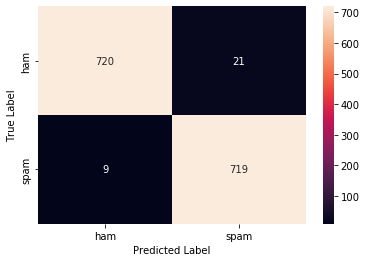

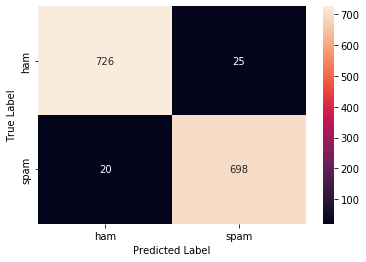

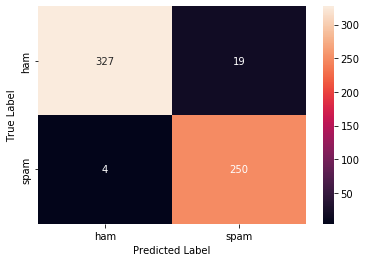

In [71]:
data = {'y_Actual':    y_test_SO.values,
        'y_Predicted': y_pred_SO
        }
d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['True Label'], colnames=['Predicted Label'])
sn.heatmap(confusion_matrix, annot=True,fmt='d',xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.show()

data = {'y_Actual':    y_test_CO.values,
        'y_Predicted': y_pred_CO
        }
d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['True Label'], colnames=['Predicted Label'])
sn.heatmap(confusion_matrix, annot=True,fmt='d',xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.show()


data = {'y_Actual':    y_test_CU.values,
        'y_Predicted': y_pred_CU
        }
d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['True Label'], colnames=['Predicted Label'])
sn.heatmap(confusion_matrix, annot=True,fmt='d',xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.show()

## **Vectorization**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
data = df.copy()
data.columns = ['message','label' ]


In [10]:
data["length"] = data["message"].apply(len)
data.sort_values(by='length', ascending=False).head(10)

,message,label,length
949,"Subject: fw : "" red , white and blue out ""\n- ...",0,31860
1988,Subject: online pharxmacy 80 % off all meds\nd...,1,21749
4287,Subject: the expatriate zone - issue # 1 2 / 1...,0,16061
3560,Subject: fw : thought this was important\nbamm...,0,15999
4792,"Subject: we ' ve got your info by internet , h...",1,14460
4903,Subject: re : coastal oil & gas corporation\nm...,0,13178
2935,Subject: re : coastal oil & gas corporation\nd...,0,13170
828,Subject: re : coastal oil & gas corporation\nd...,0,12830
3514,Subject: free profiles you choose derm\nhtmlhe...,1,11932
4249,Subject: re : sitara release ( re : changes in...,0,11585


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eed57b910>,
      dtype=object)

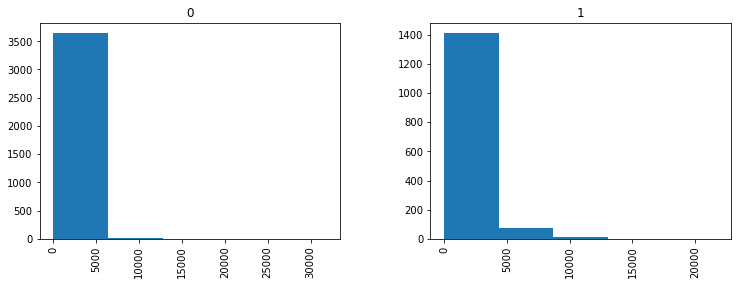

In [11]:
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [12]:
#data["message"] = data["message"].str.replace('\W+',' ').str.replace('\s+',' ').str.strip()
#data["message"] = data["message"].str.split()
#data["message"]=[[word for word in k if word not in stopwords.words('english')]for k in data["message"]]
data.sort_values(by='length', ascending=False).head(10)

,message,label,length
949,"Subject: fw : "" red , white and blue out ""\n- ...",0,31860
1988,Subject: online pharxmacy 80 % off all meds\nd...,1,21749
4287,Subject: the expatriate zone - issue # 1 2 / 1...,0,16061
3560,Subject: fw : thought this was important\nbamm...,0,15999
4792,"Subject: we ' ve got your info by internet , h...",1,14460
4903,Subject: re : coastal oil & gas corporation\nm...,0,13178
2935,Subject: re : coastal oil & gas corporation\nd...,0,13170
828,Subject: re : coastal oil & gas corporation\nd...,0,12830
3514,Subject: free profiles you choose derm\nhtmlhe...,1,11932
4249,Subject: re : sitara release ( re : changes in...,0,11585


In [13]:
import string
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [14]:
data['message'].head(1).apply(transform_message)

0    [Subject, enron, methanol, , meter, , , 988291...
Name: message, dtype: object

In [19]:
vectorization = CountVectorizer(analyzer = transform_message)
X = vectorization.fit(data["message"][:10])

In [20]:
X_transform = X.transform([data['messages']]

CountVectorizer(analyzer=<function transform_message at 0x7f7eed4d79d0>)